In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-qr/balanced_dataset.csv


In [3]:
!pip uninstall -y bigframes cudf-cu12 cudf-polars-cu12 pylibcudf-cu12 pylibcugraph-cu12 pynvjitlink-cu12 cuml-cu12 libcugraph-cu12

Found existing installation: bigframes 2.12.0
Uninstalling bigframes-2.12.0:
  Successfully uninstalled bigframes-2.12.0
Found existing installation: cudf-cu12 25.2.2
Uninstalling cudf-cu12-25.2.2:
  Successfully uninstalled cudf-cu12-25.2.2
Found existing installation: cudf-polars-cu12 25.6.0
Uninstalling cudf-polars-cu12-25.6.0:
  Successfully uninstalled cudf-polars-cu12-25.6.0
Found existing installation: pylibcudf-cu12 25.2.2
Uninstalling pylibcudf-cu12-25.2.2:
  Successfully uninstalled pylibcudf-cu12-25.2.2
Found existing installation: pylibcugraph-cu12 25.6.0
Uninstalling pylibcugraph-cu12-25.6.0:
  Successfully uninstalled pylibcugraph-cu12-25.6.0
Found existing installation: pynvjitlink-cu12 0.5.2
Uninstalling pynvjitlink-cu12-0.5.2:
  Successfully uninstalled pynvjitlink-cu12-0.5.2
Found existing installation: cuml-cu12 25.2.1
Uninstalling cuml-cu12-25.2.1:
  Successfully uninstalled cuml-cu12-25.2.1
Found existing installation: libcugraph-cu12 25.6.0
Uninstalling libcugraph

In [4]:
!pip install -q transformers datasets scikit-learn accelerate torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 10.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 43.3 MB/s eta 0:00:00:00:0100:01


In [5]:
import pandas as pd
df = pd.read_csv("/kaggle/input/dataset-qr/balanced_dataset.csv")
print(df)

                                                      url        type
0       https://spreadsheets.google.com/spreadsheet/vi...    phishing
1       http://www.plasmacamcnc.com/e-brochure/index.html  defacement
2                         math.nsc.ru/conference/csr2009/    phishing
3       esxcc.com/js/index.htm?us.battle.net/login/en/...      benign
4                  wordiq.com/definition/Kings_of_Navarre      benign
...                                                   ...         ...
152515                           xgc.com/ada/predefin.htm    phishing
152516  http://www.xpj5988.com/pages/novice/register.h...     malware
152517  www.infoworld.com/article/03/06/17/HNrevoke_1....    phishing
152518  www.experts-exchange.com/Web/WebDevSoftware/Dr...    phishing
152519  www.netaphor.com/products/cyberonsactiveXinfo.asp    phishing

[152520 rows x 2 columns]


In [6]:
df.groupby('type').apply(lambda x: x.sample(1)).reset_index(drop=True)

/tmp/ipykernel_47/582930467.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('type').apply(lambda x: x.sample(1)).reset_index(drop=True)


,url,type
0,mylife.com/zip-codes/b3-477228/,benign
1,http://prepechal.net/index.php?view=article&id...,defacement
2,http://www.newstudy.net/community/Web_nMngr.as...,malware
3,www.thegiacarangifoundation.org/home.html,phishing


In [7]:
df.groupby('type').apply(lambda x: x.sample(1)).reset_index(drop=True)


/tmp/ipykernel_47/2332416993.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('type').apply(lambda x: x.sample(1)).reset_index(drop=True)


,url,type
0,lewisandclarkjournals.unl.edu/read/?_xmlsrc=lc...,benign
1,http://www.kidsfestshellharbour.com.au/index.p...,defacement
2,http://9779.info/%E7%AE%80%E5%8D%95%E7%9A%84%E...,malware
3,dropbox.mini-shop.si,phishing


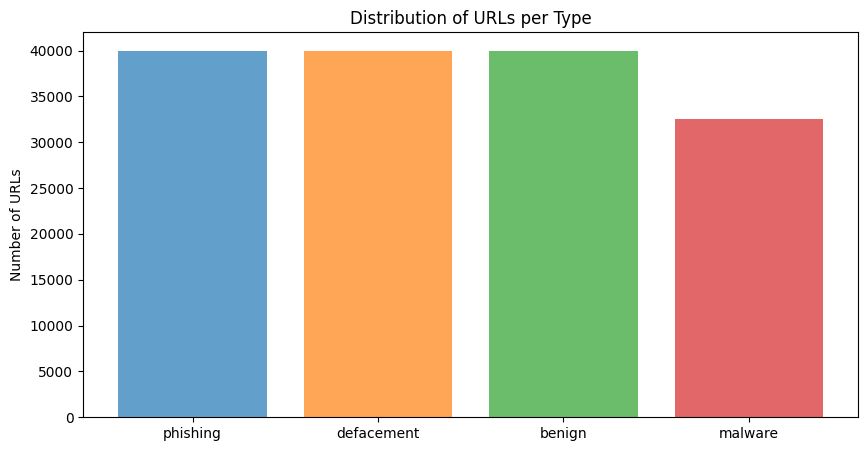

Counter({'phishing': 40000, 'defacement': 40000, 'benign': 40000, 'malware': 32520})


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
types = df['type'].values
counter_types = Counter(types)
type_names = list(counter_types.keys())
type_values = list(counter_types.values())

# Define a color palette
color_palette = plt.get_cmap('tab10')  # You can choose any colormap you like
colors = [color_palette(i) for i in range(len(type_names))]

# Map types to colors
type_color_map = {type_name: colors[i] for i, type_name in enumerate(type_names)}

# Get the corresponding color for each type
bar_colors = [type_color_map[type_name] for type_name in type_names]

# Plot the bar chart
y_pos = np.arange(len(type_names))
plt.figure(1, figsize=(10, 5))
plt.bar(y_pos, type_values, align='center', alpha=0.7, color=bar_colors)
plt.xticks(y_pos, type_names)
plt.ylabel('Number of URLs')
plt.title('Distribution of URLs per Type')
# plt.gca().yaxis.grid(True)
plt.show()

print(counter_types)

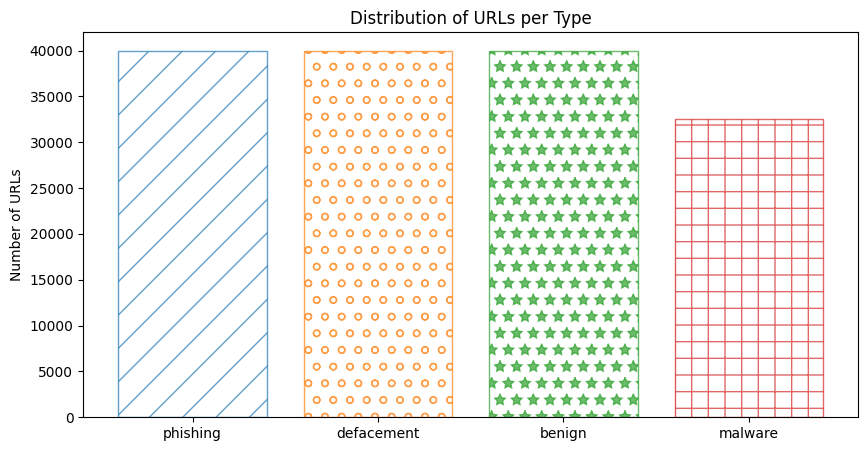

Counter({'phishing': 40000, 'defacement': 40000, 'benign': 40000, 'malware': 32520})


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

types = df['type'].values
counter_types = Counter(types)
type_names = list(counter_types.keys())
type_values = list(counter_types.values())

# Define a color palette
color_palette = plt.get_cmap('tab10')  # You can choose any colormap you like
colors = [color_palette(i) for i in range(len(type_names))]

# Map types to colors
type_color_map = {type_name: colors[i] for i, type_name in enumerate(type_names)}

# Get the corresponding color for each type
bar_colors = [type_color_map[type_name] for type_name in type_names]

# Define patterns for each bar
patterns = ['/', 'o', '*', '+'] # You can define your patterns here

# Plot the bar chart
y_pos = np.arange(len(type_names))
plt.figure(1, figsize=(10, 5))
bars = plt.bar(y_pos, type_values, align='center', alpha=0.7, color='white', edgecolor=bar_colors)

# Add patterns to bars
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.xticks(y_pos, type_names)
plt.ylabel('Number of URLs')
plt.title('Distribution of URLs per Type')
# plt.gca().yaxis.grid(True)
plt.show()

print(counter_types)

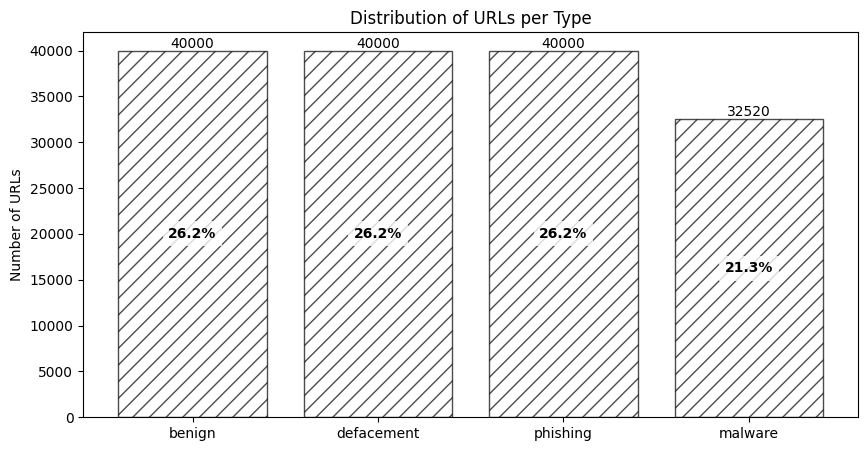

Counter({'phishing': 40000, 'defacement': 40000, 'benign': 40000, 'malware': 32520})


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

types = df['type'].values

counter_types = Counter(types)

type_names = list(counter_types.keys())
type_values = list(counter_types.values())

sorted_indices = np.argsort(type_values)[::-1]
type_names = [type_names[i] for i in sorted_indices]
type_values = [type_values[i] for i in sorted_indices]

total_count = sum(type_values)
percentages = [value / total_count * 100 for value in type_values]

pattern = '//'

y_pos = np.arange(len(type_names))
plt.figure(1, figsize=(10, 5))
bars = plt.bar(y_pos, type_values, align='center', alpha=0.7, color='none', edgecolor='black', hatch=pattern)

for bar, value, percentage in zip(bars, type_values, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'), fontweight='bold')

plt.xticks(y_pos, type_names)
plt.ylabel('Number of URLs')
plt.title('Distribution of URLs per Type')
plt.show()

print(counter_types)

In [11]:
df['url_len'] = [len(url) for url in df.url]
df.head()

,url,type,url_len
0,https://spreadsheets.google.com/spreadsheet/vi...,phishing,95
1,http://www.plasmacamcnc.com/e-brochure/index.html,defacement,49
2,math.nsc.ru/conference/csr2009/,phishing,31
3,esxcc.com/js/index.htm?us.battle.net/login/en/...,benign,88
4,wordiq.com/definition/Kings_of_Navarre,benign,38


In [12]:
from sklearn.model_selection import train_test_split

df = df.sample(frac=1, random_state=42).reset_index(drop=True)   # shuffle

train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df['type'], random_state=42
)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

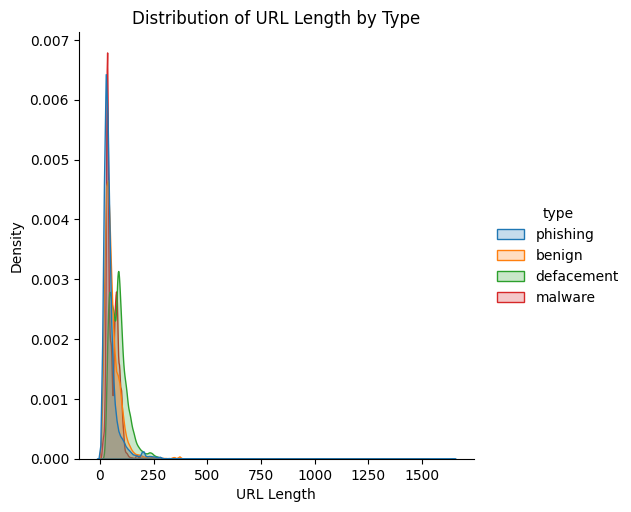

In [13]:
import seaborn as sns
# Plot distribution of 'url_len' for each 'type'
sns.displot(df, x='url_len', hue='type', kind='kde', fill=True)

# Add labels and title
plt.xlabel('URL Length')
plt.ylabel('Density')
plt.title('Distribution of URL Length by Type')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(df["type"])

df["type_code"] = le.transform(df["type"])
df

,url,type,url_len,type_code
0,http://47.74.231.192/,phishing,21,3
1,kripalu.org/presenter/V0005114/david_emerson,benign,44,0
2,passbookls.info,phishing,15,3
3,http://www.pmu-pleven.com/index.php?option=com...,defacement,121,1
4,www.cs.arizona.edu/patterns/weaving/books/warp...,phishing,57,3
...,...,...,...,...
152515,library.missouristate.edu/,benign,26,0
152516,http://www.internationalfamilytransitions.com/...,defacement,174,1
152517,hoovers.com/company/Dorel_Industries_Inc/hjtsh...,benign,54,0
152518,http://olx.ua/uk/i2/dnepropetrovsk/obyavlenie/...,benign,85,0


In [15]:
le_label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_label_mapping

{'benign': 0, 'defacement': 1, 'malware': 2, 'phishing': 3}

In [17]:
from datasets import load_dataset, DatasetDict

# 1. Load your LOCAL CSV file (the 1.6 lakh one)
#    (Make sure 'balanced_dataset_40k.csv' is in the same folder)
print("Loading local file 'balanced_dataset_40k.csv'...")
full_dataset = load_dataset('csv', data_files='/kaggle/input/dataset-qr/balanced_dataset.csv')

# 2. Split it into 80% train, 10% val, 10% test
#    load_dataset('csv') creates a 'train' split by default
train_test_dataset = full_dataset['train'].train_test_split(test_size=0.2, seed=42, shuffle=True)
val_test_dataset = train_test_dataset['test'].train_test_split(test_size=0.5, seed=42, shuffle=True)

# 3. Create the final DatasetDict with the correct splits
dataset = DatasetDict({
    'train': train_test_dataset['train'],
    'val': val_test_dataset['train'],  # 'val' is used in your Trainer
    'test': val_test_dataset['test']
})

# 4. Rename YOUR label column (which is 'type') to 'labels'
#    (The Trainer script needs the label column to be named 'labels')
dataset = dataset.rename_column("type", "labels")

print("--- SUCCESSFULLY LOADED LOCAL CSV ---")
print("New dataset splits:")
print(dataset) # This will now show the smaller numbers (e.g., train: ~128000)

Loading local file 'balanced_dataset_40k.csv'...


Generating train split: 0 examples [00:00, ? examples/s]

--- SUCCESSFULLY LOADED LOCAL CSV ---
New dataset splits:
DatasetDict({
    train: Dataset({
        features: ['url', 'labels'],
        num_rows: 122016
    })
    val: Dataset({
        features: ['url', 'labels'],
        num_rows: 15252
    })
    test: Dataset({
        features: ['url', 'labels'],
        num_rows: 15252
    })
})


In [18]:


from datasets import DatasetDict

# 80% train, 10% validation, 10% test
dataset = DatasetDict({
    'train': train_test_dataset['train'],
    'val': val_test_dataset['train'],  # Your code used 'val' for the trainer
    'test': val_test_dataset['test']
})
dataset



DatasetDict({
    train: Dataset({
        features: ['url', 'type'],
        num_rows: 122016
    })
    val: Dataset({
        features: ['url', 'type'],
        num_rows: 15252
    })
    test: Dataset({
        features: ['url', 'type'],
        num_rows: 15252
    })
})

In [19]:
from datasets import load_dataset
dataset = dataset.rename_column("type", "labels")
dataset

DatasetDict({
    train: Dataset({
        features: ['url', 'labels'],
        num_rows: 122016
    })
    val: Dataset({
        features: ['url', 'labels'],
        num_rows: 15252
    })
    test: Dataset({
        features: ['url', 'labels'],
        num_rows: 15252
    })
})

In [20]:
# variables
checkpoint = 'google-bert/bert-base-cased'
result_dir = 'model/bert-bc-10e'
model_path = result_dir + '/model-bert-bc-10e'
tokenizer_path = result_dir + '/tokenizer-bert-bc-10e'
zip_name = result_dir + '/bert-bc-10e'
hist_path = '/bert-bc-10e-hist.csv'
# ======
num_labels = 4
id2label = {0:'benign',1:'defacement',2:'malware',3:'phishing'}
label2id = {'benign':0,'defacement':1,'malware':2,'phishing':3}

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels, id2label=id2label, label2id=label2id)
tokenizer

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertTokenizerFast(name_or_path='google-bert/bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [22]:
# (Make sure 'label2id' is defined first, e.g.:)
# label2id = {'benign': 0, 'malicious': 1} 

def tokenize_function(examples):
    # 1. Tokenize the URLs
    tokenized_inputs = tokenizer(examples['url'], truncation=True, padding='max_length', max_length=128)
    
    # 2. Convert string labels to integer IDs
    #    This is the line that fixes the error.
    tokenized_inputs['labels'] = [label2id[label] for label in examples['labels']]
    
    return tokenized_inputs

# --- RE-RUN YOUR MAPPING ---
# After updating the function above, re-run your .map() call:

print("Tokenizing dataset and converting labels...")
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset.set_format("torch")

print("Tokenization complete. 'labels' are now integers.")
print(f"Example from train set: {tokenized_dataset['train'][0]}")

Tokenizing dataset and converting labels...


Map:   0%|          | 0/122016 [00:00<?, ? examples/s]

Map:   0%|          | 0/15252 [00:00<?, ? examples/s]

Map:   0%|          | 0/15252 [00:00<?, ? examples/s]

Tokenization complete. 'labels' are now integers.
Example from train set: {'url': 'plotsnhouses.com/includes/go.php', 'labels': tensor(0), 'input_ids': tensor([  101, 15836, 15624, 17237,  1116,   119,  3254,   120,  2075,   120,
         1301,   119,   185, 16194,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     

In [23]:
from transformers import DataCollatorWithPadding

# This creates the 'data_collator' variable
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

print("'data_collator' is now defined.")

'data_collator' is now defined.


In [24]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# This creates the 'compute_metrics' function
def compute_metrics(eval_pred):
    # Predictions are logits (raw scores), labels are the true labels
    predictions, labels = eval_pred
    
    # Get the index with the highest score (this is the predicted label)
    predictions = np.argmax(predictions, axis=1)
    
    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

print("'compute_metrics' function is now defined.")

'compute_metrics' function is now defined.


In [26]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    seed=42,
    output_dir=result_dir + '/output',
    num_train_epochs=10,
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    save_strategy="epoch",            # Save at the end of each epoch
    eval_strategy="epoch",      # Evaluate at the end of each epoch
    load_best_model_at_end=True,      # Load the best model at the end of training
    report_to="none",                 # Fixes the wandb error
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['val'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# This will now work
trainer.train()

/tmp/ipykernel_47/1017282599.py:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.110500,0.087908,0.972790,0.972792,0.972903,0.972790
2,0.082300,0.086265,0.977970,0.978047,0.978305,0.977970
3,0.051400,0.093981,0.976724,0.976718,0.976778,0.976724
4,0.043800,0.106537,0.978495,0.978524,0.978609,0.978495
5,0.025100,0.115268,0.977380,0.977397,0.977435,0.977380
6,0.017400,0.144825,0.976987,0.977048,0.977300,0.976987
7,0.010300,0.143061,0.977380,0.977355,0.977341,0.977380
8,0.007500,0.160549,0.977839,0.977839,0.977859,0.977839
9,0.002900,0.170434,0.978560,0.978571,0.978604,0.978560
10,0.001100,0.178423,0.978036,0.978045,0.978075,0.978036


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=38130, training_loss=0.04229124224493893, metrics={'train_runtime': 18622.5903, 'train_samples_per_second': 65.52, 'train_steps_per_second': 2.048, 'total_flos': 8.026083756048384e+16, 'train_loss': 0.04229124224493893, 'epoch': 10.0})

In [27]:
trainer.evaluate(tokenized_dataset['test'])

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'eval_loss': 0.09537897258996964,
 'eval_accuracy': 0.9738394964594808,
 'eval_f1': 0.9739075049461015,
 'eval_precision': 0.9741646418516084,
 'eval_recall': 0.9738394964594808,
 'eval_runtime': 78.1338,
 'eval_samples_per_second': 195.204,
 'eval_steps_per_second': 6.105,
 'epoch': 10.0}

In [30]:
df_hist = pd.DataFrame(trainer.state.log_history)
df_hist.to_csv(result_dir + hist_path)

In [31]:
bert_eval_data = {
    'eval_loss': 0.09537897258996964,
    'eval_accuracy': 0.9738394964594808,
    'eval_f1': 0.9739075049461015,
    'eval_precision': 0.9741646418516084,
    'eval_recall': 0.9738394964594808,
    'eval_runtime': 78.1338,
    'eval_samples_per_second': 195.204,
    'eval_steps_per_second': 6.105,
    'epoch': 10.0,

    # Training output
    'global_step': 38130,
    'training_loss': 0.04229124224493893,
    'train_runtime': 18622.5903,
    'train_samples_per_second': 65.52,
    'train_steps_per_second': 2.048,
    'total_flos': 8.026083756048384e+16,
    'train_loss': 0.04229124224493893
}


In [32]:
bert_epoch_logs = [
    {"epoch": 1,  "train_loss": 0.110500, "val_loss": 0.087908,  "accuracy": 0.972790, "f1": 0.972792, "precision": 0.972903, "recall": 0.972790},
    {"epoch": 2,  "train_loss": 0.082300, "val_loss": 0.086265,  "accuracy": 0.977970, "f1": 0.978047, "precision": 0.978305, "recall": 0.977970},
    {"epoch": 3,  "train_loss": 0.051400, "val_loss": 0.093981,  "accuracy": 0.976724, "f1": 0.976718, "precision": 0.976778, "recall": 0.976724},
    {"epoch": 4,  "train_loss": 0.043800, "val_loss": 0.106537,  "accuracy": 0.978495, "f1": 0.978524, "precision": 0.978609, "recall": 0.978495},
    {"epoch": 5,  "train_loss": 0.025100, "val_loss": 0.115268,  "accuracy": 0.977380, "f1": 0.977397, "precision": 0.977435, "recall": 0.977380},
    {"epoch": 6,  "train_loss": 0.017400, "val_loss": 0.144825,  "accuracy": 0.976987, "f1": 0.977048, "precision": 0.977300, "recall": 0.976987},
    {"epoch": 7,  "train_loss": 0.010300, "val_loss": 0.143061,  "accuracy": 0.977380, "f1": 0.977355, "precision": 0.977341, "recall": 0.977380},
    {"epoch": 8,  "train_loss": 0.007500, "val_loss": 0.160549,  "accuracy": 0.977839, "f1": 0.977839, "precision": 0.977859, "recall": 0.977839},
    {"epoch": 9,  "train_loss": 0.002900, "val_loss": 0.170434,  "accuracy": 0.978560, "f1": 0.978571, "precision": 0.978604, "recall": 0.978560},
    {"epoch": 10, "train_loss": 0.001100, "val_loss": 0.178423,  "accuracy": 0.978036, "f1": 0.978045, "precision": 0.978075, "recall": 0.978036}
]


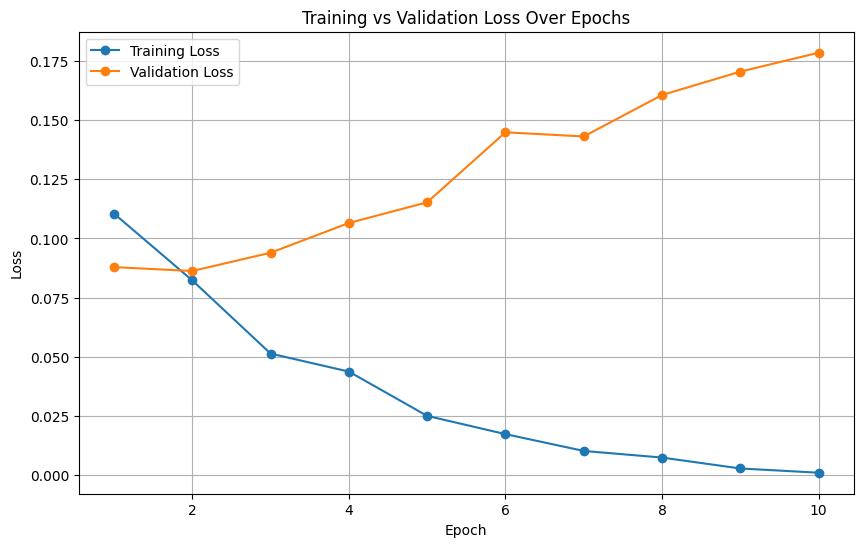

In [33]:
import matplotlib.pyplot as plt

epochs = [x["epoch"] for x in bert_epoch_logs]
train_loss = [x["train_loss"] for x in bert_epoch_logs]
val_loss = [x["val_loss"] for x in bert_epoch_logs]

plt.figure(figsize=(10,6))
plt.plot(epochs, train_loss, marker='o', label="Training Loss")
plt.plot(epochs, val_loss,  marker='o', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Over Epochs")
plt.grid(True)
plt.legend()
plt.show()


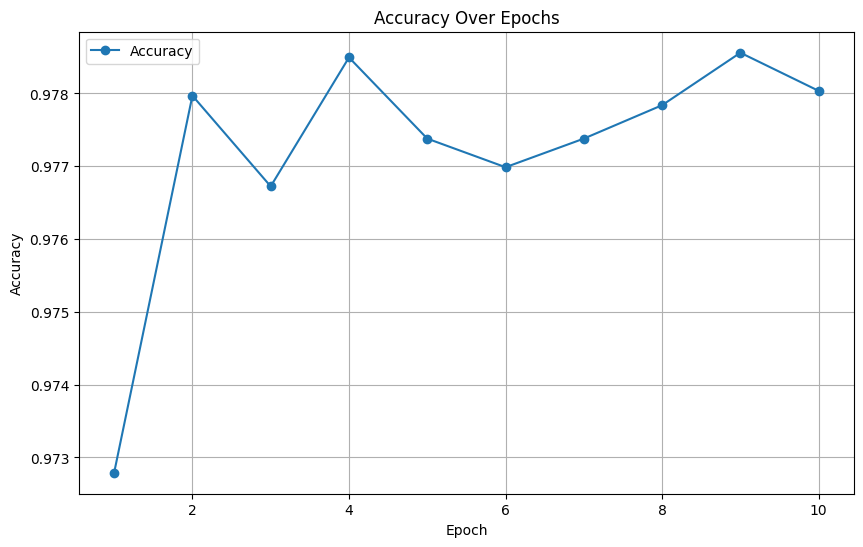

In [34]:
# Extracting data for plotting
accuracy = [x["accuracy"] for x in bert_epoch_logs]

plt.figure(figsize=(10,6))
plt.plot(epochs, accuracy, marker='o', label="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.legend()
plt.show()

In [35]:
print("Final Evaluation Metrics:")
for k, v in bert_eval_data.items():
    print(f"{k}: {v}")

Final Evaluation Metrics:
eval_loss: 0.09537897258996964
eval_accuracy: 0.9738394964594808
eval_f1: 0.9739075049461015
eval_precision: 0.9741646418516084
eval_recall: 0.9738394964594808
eval_runtime: 78.1338
eval_samples_per_second: 195.204
eval_steps_per_second: 6.105
epoch: 10.0
global_step: 38130
training_loss: 0.04229124224493893
train_runtime: 18622.5903
train_samples_per_second: 65.52
train_steps_per_second: 2.048
total_flos: 8.026083756048384e+16
train_loss: 0.04229124224493893


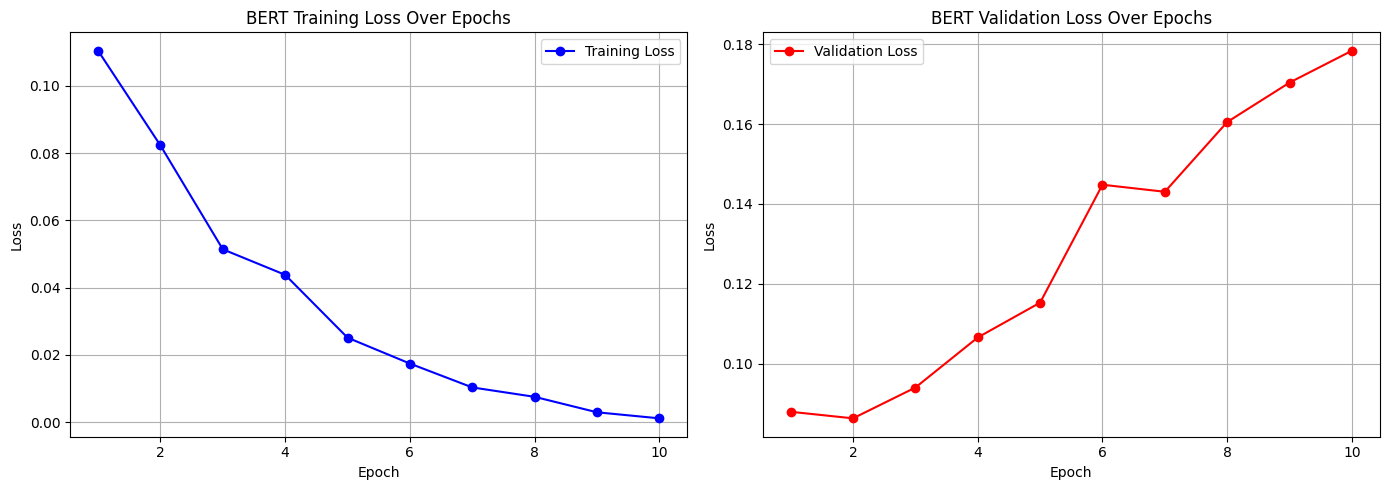

In [37]:
# Extracting data for plotting
epochs = [log['epoch'] for log in bert_epoch_logs]
training_losses = [log['train_loss'] for log in bert_epoch_logs]       # FIXED
validation_losses = [log['val_loss'] for log in bert_epoch_logs]       # FIXED

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plotting training loss
axs[0].plot(epochs, training_losses, label='Training Loss', marker='o', color='blue')
axs[0].set_title('BERT Training Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].grid(True)
axs[0].legend()

# Plotting validation loss
axs[1].plot(epochs, validation_losses, label='Validation Loss', marker='o', color='red')
axs[1].set_title('BERT Validation Loss Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

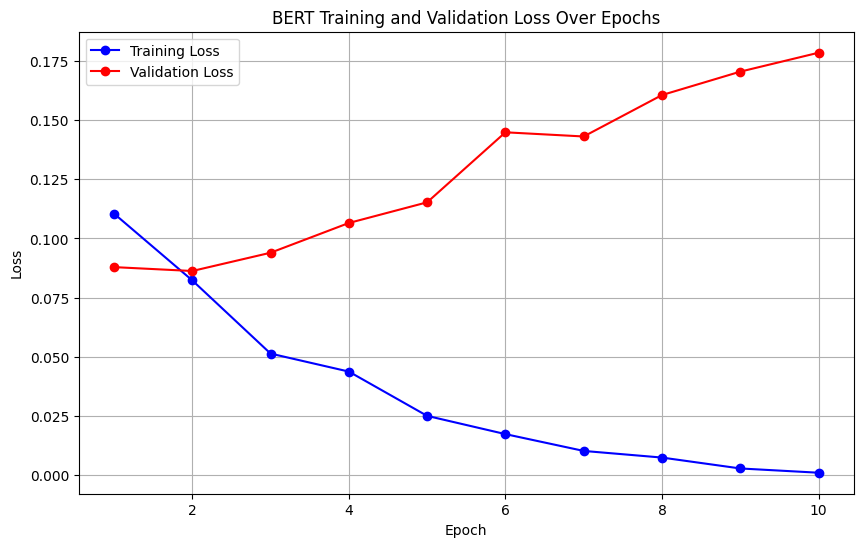

In [38]:
# Extracting data for plotting
epochs = [log['epoch'] for log in bert_epoch_logs]
training_losses = [log['train_loss'] for log in bert_epoch_logs]     # FIXED
validation_losses = [log['val_loss'] for log in bert_epoch_logs]     # FIXED

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_losses, label='Training Loss', marker='o', color='blue')
plt.plot(epochs, validation_losses, label='Validation Loss', marker='o', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BERT Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

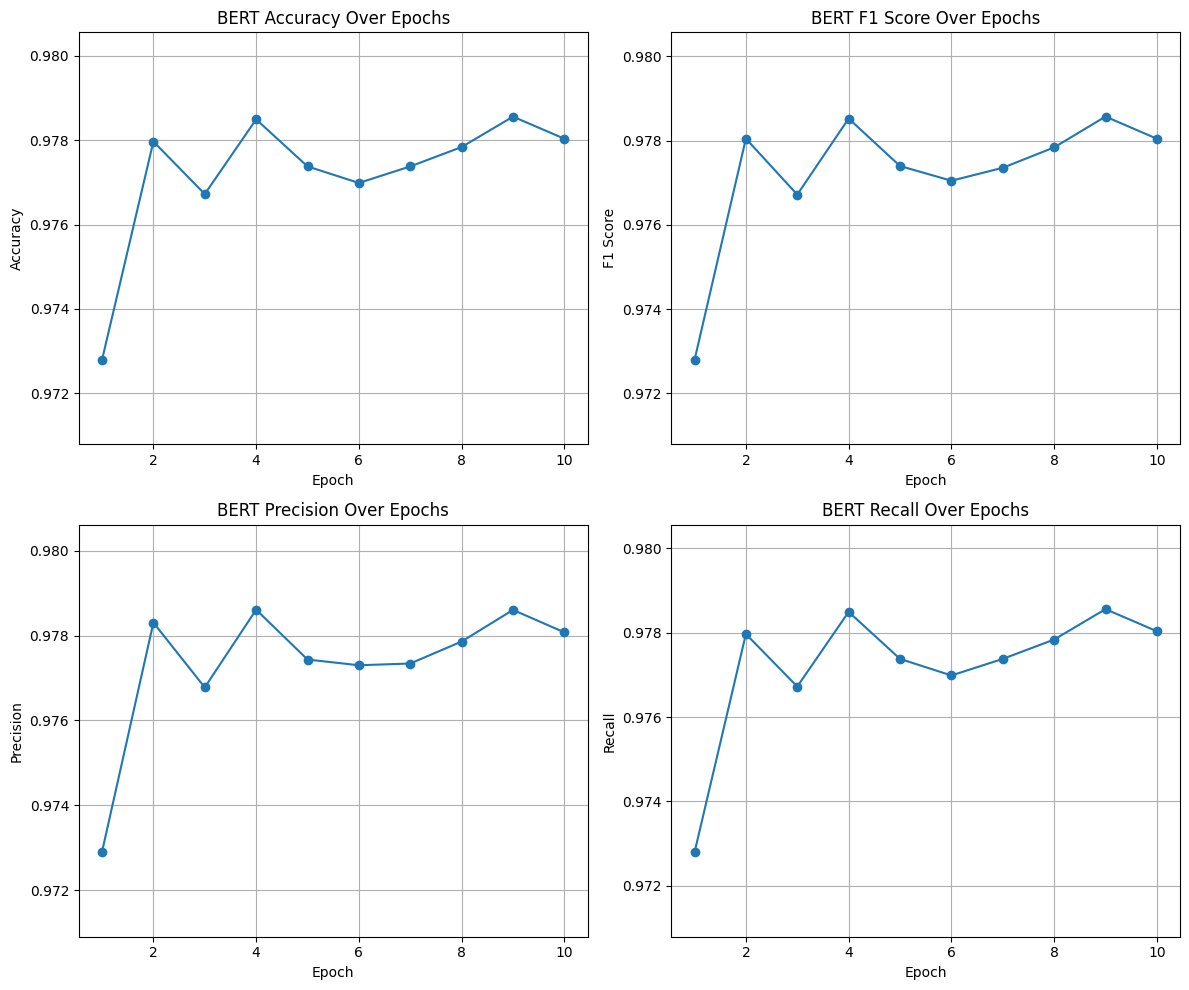

In [39]:
import matplotlib.pyplot as plt

# Use the variable that actually contains epoch-wise logs
# (your data from earlier: bert_epoch_logs)
epochs = [log['epoch'] for log in bert_epoch_logs]
accuracy = [log['accuracy'] for log in bert_epoch_logs]
f1 = [log['f1'] for log in bert_epoch_logs]
precision = [log['precision'] for log in bert_epoch_logs]
recall = [log['recall'] for log in bert_epoch_logs]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# helper to compute tight y-limits (small margin)
def tight_ylim(values, margin=0.002):
    mn, mx = min(values), max(values)
    return (max(0.0, mn - margin), min(1.0, mx + margin))

# Accuracy
axs[0, 0].plot(epochs, accuracy, marker='o')
axs[0, 0].set_title('BERT Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)
axs[0, 0].set_ylim(tight_ylim(accuracy))

# F1
axs[0, 1].plot(epochs, f1, marker='o')
axs[0, 1].set_title('BERT F1 Score Over Epochs')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('F1 Score')
axs[0, 1].grid(True)
axs[0, 1].set_ylim(tight_ylim(f1))

# Precision
axs[1, 0].plot(epochs, precision, marker='o')
axs[1, 0].set_title('BERT Precision Over Epochs')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].grid(True)
axs[1, 0].set_ylim(tight_ylim(precision))

# Recall
axs[1, 1].plot(epochs, recall, marker='o')
axs[1, 1].set_title('BERT Recall Over Epochs')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].grid(True)
axs[1, 1].set_ylim(tight_ylim(recall))

plt.tight_layout()
plt.show()


BERT Classification Report:

              precision  recall  f1-score     support
benign           0.9912  0.9930    0.9921  42951.0000
defacement       0.9978  0.9956    0.9967   9557.0000
malware          0.9956  0.9646    0.9799   3253.0000
phishing         0.9533  0.9578    0.9555   9359.0000
accuracy         0.9869  0.9869    0.9869      0.9869
macro avg        0.9845  0.9778    0.9811  65120.0000
weighted avg     0.9870  0.9869    0.9869  65120.0000

Overall Accuracy: 0.986932


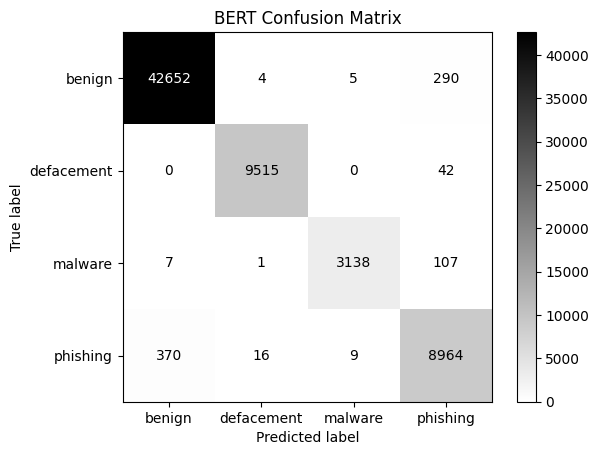

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)
import pandas as pd

# -----------------------------
# 1. YOUR CONFUSION MATRIX
# -----------------------------
conf_matrix_bert = np.array([
    [42652, 4, 5, 290],
    [0, 9515, 0, 42],
    [7, 1, 3138, 107],
    [370, 16, 9, 8964]
])

# -----------------------------
# 2. RECONSTRUCT TRUE + PRED LABELS
# -----------------------------
true_labels_bert = np.repeat([0, 1, 2, 3], conf_matrix_bert.sum(axis=1))

predicted_labels_bert = np.concatenate([
    np.repeat(0, conf_matrix_bert[0, 0]), np.repeat(1, conf_matrix_bert[0, 1]),
    np.repeat(2, conf_matrix_bert[0, 2]), np.repeat(3, conf_matrix_bert[0, 3]),

    np.repeat(0, conf_matrix_bert[1, 0]), np.repeat(1, conf_matrix_bert[1, 1]),
    np.repeat(2, conf_matrix_bert[1, 2]), np.repeat(3, conf_matrix_bert[1, 3]),

    np.repeat(0, conf_matrix_bert[2, 0]), np.repeat(1, conf_matrix_bert[2, 1]),
    np.repeat(2, conf_matrix_bert[2, 2]), np.repeat(3, conf_matrix_bert[2, 3]),

    np.repeat(0, conf_matrix_bert[3, 0]), np.repeat(1, conf_matrix_bert[3, 1]),
    np.repeat(2, conf_matrix_bert[3, 2]), np.repeat(3, conf_matrix_bert[3, 3]),
])

# -----------------------------
# 3. LABEL NAMES
# -----------------------------
labels = ["benign", "defacement", "malware", "phishing"]

# -----------------------------
# 4. CLASSIFICATION REPORT + ACCURACY
# -----------------------------
report_bert = classification_report(
    true_labels_bert,
    predicted_labels_bert,
    target_names=labels,
    output_dict=True
)

accuracy_bert = accuracy_score(true_labels_bert, predicted_labels_bert)

report_bert["accuracy"] = accuracy_bert

df_report = pd.DataFrame(report_bert).T
df_report = df_report.round(4)

print("\nBERT Classification Report:\n")
print(df_report)

print(f"\nOverall Accuracy: {accuracy_bert:.6f}")

# -----------------------------
# 5. CONFUSION MATRIX PLOT
# -----------------------------
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix_bert,
    display_labels=labels
)

disp.plot(cmap="binary", values_format="d")
plt.title("BERT Confusion Matrix")
plt.show()